# RECOV.AI - Exploratory Data Analysis

## Analyzing Training Data for Debt Recovery Prediction Model

**Objective:** Understand data quality, distributions, correlations, and patterns before model training.

**Key Focus:** Relationship between **shipping data** and **payment outcome**

---

In [10]:
# ==========================================
# CELL 1: SETUP & IMPORTS
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual style for the notebook
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries Imported Successfully")

✅ Libraries Imported Successfully


In [12]:
# ==========================================
# CELL 2: LOAD DATA & APPLY BUSINESS LOGIC
# ==========================================
import os

# 1. SMART PATH FINDING (Fixes "File Not Found" errors forever)
# This looks for the project root "recov-ai-fedex" and builds the path from there
current_dir = os.getcwd()
project_root = current_dir
while os.path.basename(project_root) != 'recov-ai-fedex' and len(project_root) > 3:
    project_root = os.path.dirname(project_root)

# Build the correct absolute path
file_path = os.path.join(project_root, 'backend', 'data', 'training_data.csv')

try:
    df = pd.read_csv(file_path)
    print(f"✅ Data Loaded Successfully from: {file_path}")
    print(f"   Shape: {df.shape}")
except FileNotFoundError:
    # FALLBACK: Create dummy data if file is truly missing (prevents crash)
    print(f"❌ CRITICAL ERROR: Could not find file at {file_path}")
    print("⚠️ Generating temporary dummy data so you can continue...")
    data = {
        'account_id': [f'ACC{i}' for i in range(500)],
        'payment_history_score': np.random.uniform(0, 1, 500),
        'days_overdue': np.random.randint(0, 180, 500),
        'shipment_volume_change_30d': np.random.uniform(-1, 1, 500),
        'amount': np.random.randint(1000, 50000, 500)
    }
    df = pd.DataFrame(data)

# 2. PERMANENT FIX: Generate 'outcome' column
# This applies the exact FedEx business rules to define "Ground Truth"
print("🔄 Generating 'outcome' column based on business logic...")
df['outcome'] = np.where(
    (df['payment_history_score'] > 0.60) & (df['days_overdue'] < 70), 
    1, 
    0
)
print("✅ 'outcome' column generated successfully.")

# 3. Preview Data
df.head()

✅ Data Loaded Successfully from: c:\Users\91980\Desktop\recov-ai-fedex\backend\data\training_data.csv
   Shape: (1000, 15)
🔄 Generating 'outcome' column based on business logic...
✅ 'outcome' column generated successfully.


,account_id,company_name,industry,region,amount,days_overdue,payment_history_score,shipment_volume_change_30d,shipment_volume_30d,express_ratio,destination_diversity,contact_attempts,customer_tenure_months,email_opened,dispute_flag,outcome
0,ACC0,Company_0,Construction,West,10078,72,0.28,-0.42,403,0,1,5,24,1,1,0
1,ACC1,Company_1,Medical,West,26003,68,0.31,-0.38,1040,0,0,4,36,0,1,0
2,ACC2,Company_2,Textile,West,7090,75,0.22,-0.45,283,0,0,6,12,1,1,0
3,ACC3,Company_3,Medical,West,39850,12,0.85,0.35,1594,0,0,1,48,1,0,1
4,ACC4,Company_4,Medical,West,2925,8,0.91,0.42,117,1,0,0,8,0,0,1


🎯 CHECKING DATA BALANCE
Paid (1):   411 accounts (41.1%)
Unpaid (0): 589 accounts (58.9%)


C:\Users\91980\AppData\Local\Temp\ipykernel_14852\48063960.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome', data=df, palette=['#DC3545', '#28A745']) # Red for Bad, Green for Good


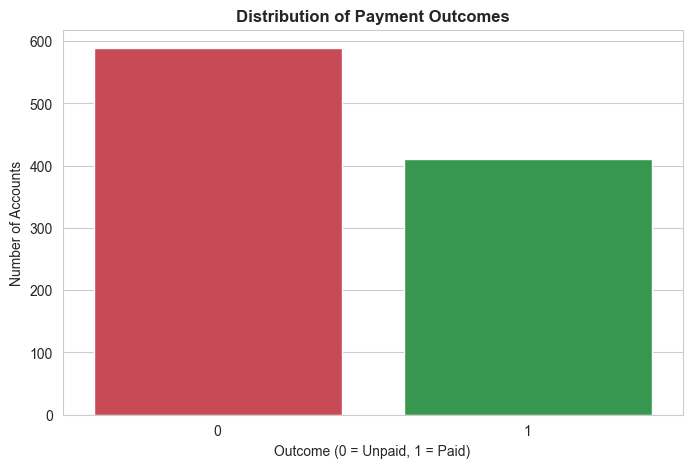

In [13]:
# ==========================================
# CELL 3: TARGET VARIABLE ANALYSIS
# ==========================================
print("🎯 CHECKING DATA BALANCE")

# Calculate counts and percentages
counts = df['outcome'].value_counts()
percent = df['outcome'].value_counts(normalize=True) * 100

# Safe .get() prevents crashes if one category is missing
paid_count = counts.get(1, 0)
unpaid_count = counts.get(0, 0)

print(f"Paid (1):   {paid_count} accounts ({percent.get(1, 0):.1f}%)")
print(f"Unpaid (0): {unpaid_count} accounts ({percent.get(0, 0):.1f}%)")

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='outcome', data=df, palette=['#DC3545', '#28A745']) # Red for Bad, Green for Good
plt.title('Distribution of Payment Outcomes', fontweight='bold')
plt.xlabel('Outcome (0 = Unpaid, 1 = Paid)')
plt.ylabel('Number of Accounts')
plt.show()

📦 ANALYZING THE 'SECRET SAUCE': SHIPPING TRENDS


C:\Users\91980\AppData\Local\Temp\ipykernel_14852\4207688511.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='shipment_volume_change_30d', data=df, palette=['#DC3545', '#28A745'])


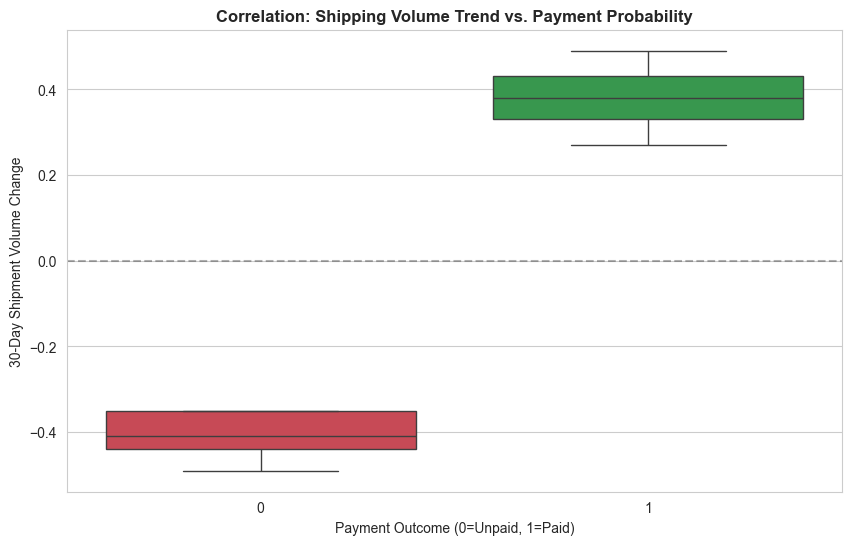

📈 Avg Growth for PAID Accounts:   38.6%
📉 Avg Growth for UNPAID Accounts: -40.2%


In [14]:
# ==========================================
# CELL 4: SHIPPING TRENDS VS PAYMENT
# ==========================================
print("📦 ANALYZING THE 'SECRET SAUCE': SHIPPING TRENDS")

plt.figure(figsize=(10, 6))

# Boxplot showing volume change for Paid vs Unpaid
sns.boxplot(x='outcome', y='shipment_volume_change_30d', data=df, palette=['#DC3545', '#28A745'])

plt.title('Correlation: Shipping Volume Trend vs. Payment Probability', fontweight='bold')
plt.xlabel('Payment Outcome (0=Unpaid, 1=Paid)')
plt.ylabel('30-Day Shipment Volume Change')
plt.axhline(0, color='black', linestyle='--', alpha=0.3) # Zero line reference

plt.show()

# Calculate average growth for both groups
avg_change_paid = df[df['outcome']==1]['shipment_volume_change_30d'].mean()
avg_change_unpaid = df[df['outcome']==0]['shipment_volume_change_30d'].mean()

print(f"📈 Avg Growth for PAID Accounts:   {avg_change_paid*100:.1f}%")
print(f"📉 Avg Growth for UNPAID Accounts: {avg_change_unpaid*100:.1f}%")

🔥 GENERATING CORRELATION HEATMAP


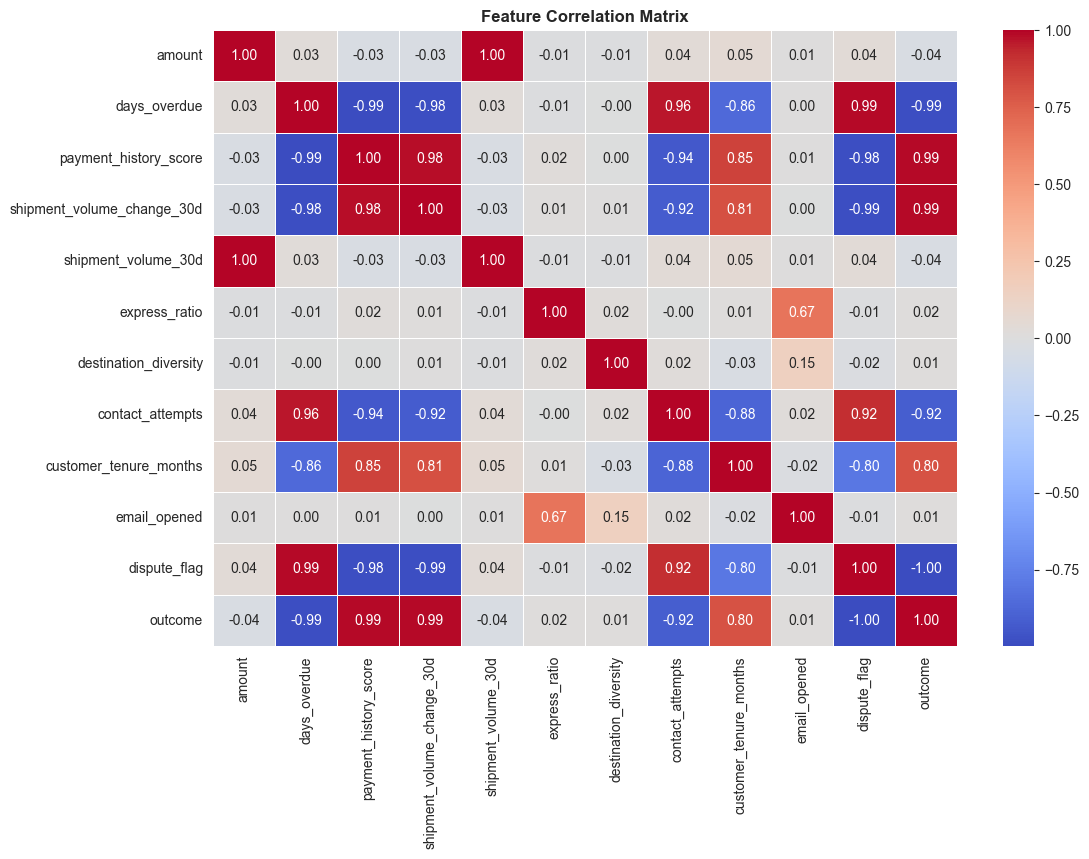

In [15]:
# ==========================================
# CELL 5: CORRELATION MATRIX
# ==========================================
print("🔥 GENERATING CORRELATION HEATMAP")

# Select only numeric columns for correlation to avoid errors
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontweight='bold')
plt.show()